<a href="https://colab.research.google.com/github/wlgns0313/test1/blob/main/chapter02_mathematical_building_blocks_i%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# The mathematical building blocks of neural networks

## A first look at a neural network

**Loading the MNIST dataset in Keras**

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
#2번째 줄 코드 예시 : (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
mnist
#mnist.load_data?와 같이 코드 뒤에 ?를 붙이면 설명서 출력

<module 'keras.api.datasets.mnist' from '/usr/local/lib/python3.11/dist-packages/keras/api/datasets/mnist/__init__.py'>

In [ ]:
train_images.shape
#shape : 모습 출력

(60000, 28, 28)

In [ ]:
train_images[0]
# train_images에 60000개의 28x28(Pixel) 그림이 존재

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [ ]:
len(train_labels) #len 함수 : 리스트의 크기 (원소의 개수) 알려줌

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**The network architecture**

In [ ]:
from tensorflow import keras #keras 정의
from tensorflow.keras import layers #layers 정의
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
#크기 784(28x28짜리 데이터) -> relu : 1st layer -> 크기 512짜리 데이터 -> softmax : 2nd layer -> 크기 10짜리 데이터

#가중치 : w_1 = 512x784 -> x_1(784x1 데이터)에 곱해져 512짜리 데이터로 변환 (행렬 곱으로 인해 512x784 X 784x1 = 512x1) / b1 = 512x1 (Bias : 편차)
#가중치 : w_2 = 10x512 -> w_1x_1+b_1 (512x1 데이터)에 곱해져 10x1짜리 데이터로 변환 / b2 = 10x1 (Bias : 편차)

#최종목표 : w_1 b_1 / w_2 b_2를 계속 바꿔가며(Optimizer을 통한 값 조정) 실험 -> True Target과의 차이를 최대한으로 좁힘
#loss function : layer 2개 거친 후 true target과 데이터와의 차이 (w_1 b_1 / w_2 b_2와 연관)

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
#model.compilie(optimizer, loss, metrics)
#optimzer : 결과를 바탕으로 w값 b값 바꿈
#loss : True Target과의 차이

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255
#reshape을 통해 크기를 784x1로 바꿈
#astype.()/255 (정규화, normalize) 을 하는 이유 : 정확도를 늘리기 위해서 -> 2번째 4번째 열 실행 안 하고 코드를 실행할 경우 loss의 값이 대폭 상승

In [ ]:
train_images.shape
#위에서는 (60000, 28x28)이었으나 reshape 함수를 통해 28*28=784 크기로 바꿈 (함수 돌리려면 차원 맞춰야 함 ㅠ)

(60000, 784)

**"Fitting" the model**

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=100)
#데이터 개수는 60,000개 있으므로 batch_size(묶음 개수)를 128로 하면 약 469묶음 100으로 하면 600묶음 발생
#epoch : layer 2개 거치고 optimize까지 한 횟수 (한 바퀴 돌린 횟수)
#batch size는 선호되는 범위는 있으나 보통 취향 차이

Epoch 1/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8828 - loss: 0.4039
Epoch 2/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9684 - loss: 0.1081
Epoch 3/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9799 - loss: 0.0645
Epoch 4/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9857 - loss: 0.0468
Epoch 5/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9890 - loss: 0.0344


**Using the model to make predictions**

In [ ]:
test_images.shape
#마찬가지로 (10000, 28, 28) 데이터를 위에서 reshape을 통해 (10000, 28*28)로 바꿈 (함수 돌리려면 차원 맞춰야 함 ㅠ)

(10000, 784)

In [ ]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


array([2.7488347e-09, 1.0398790e-09, 4.8532564e-07, 2.1157872e-05,
       1.8544079e-12, 2.5891894e-10, 1.6399916e-14, 9.9997783e-01,
       7.6218649e-09, 4.6673844e-07], dtype=float32)

In [ ]:
predictions[0].argmax()
#argamx : 행렬 성분 중 가장 값이 큰 놈 가져옴 (7번 인덱스, 즉 8번째 녀석이 제일 크므로 7)
#argmin : 행렬 성분 중 가장 값이 작은 놈 가져옴 (6번 인덱스, 즉 7번째 녀석이 제일 작으므로 8 출력)

7

In [ ]:
predictions[0].sum()
#차이가 좀 있겠지만 이론적으로 확률 합은 1이라고 함 (1이 아닌 값 나올 수도)

0.99999994

In [ ]:
predictions[0][7]

0.9999778

In [ ]:
test_labels[0]

7

**Evaluating the model on new data**

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, batch_size=100)
print(f"test_acc: {test_acc}")
#batch_size를 설정 안 하면 313개

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9814 - loss: 0.0857
test_acc: 0.9842000007629395


In [ ]:
len(model.weights)
#model.weights(가중치) 구성 : w_1 b_1 / w_2 b_2 (2x2 크기) => 길이 : 4

4

In [ ]:
model.weights[0].shape
#첫번째 가중치의 크기 = 784x1 크기를 512로 변환해야 하므로 784x512

TensorShape([784, 512])

In [ ]:
model.weights[2].shape

TensorShape([512, 10])

## Data representations for neural networks

### Scalars (rank-0 tensors)

In [ ]:
# tenser : 데이터 창고

In [ ]:
import numpy as np
# numpy 줄여쓰겠다는 뜻
x = np.array(12)
x

array(12)

In [ ]:
x.ndim
#x는 0차원

0

In [ ]:
x.shape
#[]에 들은 게 없으니 ([]가 없으니) 아무것도 안 뜸

()

### Vectors (rank-1 tensors)

In [ ]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [ ]:
x.ndim
#[] 1세트 당 차원 1개씩 증가

1

In [ ]:
x.shape

(5,)

### Matrices (rank-2 tensors)

In [ ]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim
#[] 2세트 있음

2

In [ ]:
x.shape
#3줄, 5개

(3, 5)

### Rank-3 and higher-rank tensors

In [ ]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim
#[] 3세트 있음

3

In [ ]:
x.shape
#3x5짜리가 3개 있음

(3, 3, 5)

### Key attributes

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images.ndim
#3차원

3

In [ ]:
train_images.shape
#28x28짜리가 60000개

(60000, 28, 28)

In [ ]:
train_images.dtype
#데이터 타입이 uint8 (0~2^8-1까지 데이터 존재)
#255로 나눠야 정확성이 높았던 이유는 여기 있을지도?

dtype('uint8')

**Displaying the fourth digit**

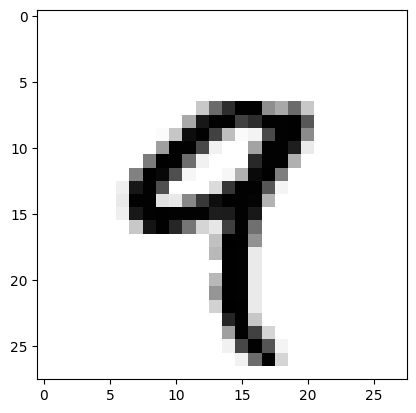

In [ ]:
import matplotlib.pyplot as plt
#줄여 쓰겠다는 뜻
digit = train_images[4]
#대입하겠다는 뜻
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

#prompt : visualize train_iamge[4] -> prompt 함수 쓰면 코드 알려줌 ㅎ

In [ ]:
train_labels[4]
#손 글자가 뭘 쓴 건지 알려줌 그림은 9를 썼으니 9라고 알려줌

np.uint8(9)

In [ ]:
my_slice = train_images[10:100]
my_slice.shape
#60000개짜리 픽셀을 10번째에서 100번째 픽셀까지만 남기고 잘랐으니 90개가 남음

(90, 28, 28)

In [ ]:
my_slice = train_images[10:100, :, :]
my_slice.shape
#범위를 지정하지 않고 :만 쓰면 냅두겠다는 뜻

(90, 28, 28)

In [ ]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[:, 14:, 14:]
#14번째에서 끝까지만 남기고 자르겠다는 뜻

In [ ]:
my_slice = train_images[:, 7:-7, 7:-7]
# 7:-7 앞에서 7번째부터 뒤에서 7번째까지만 남기고 자른다는 뜻

### The notion of data batches

In [ ]:
batch = train_images[:128]
#0번째 픽셀부터 128번째 픽셀까지 1조각 자름 (1번째 조각)

In [ ]:
batch = train_images[128:256]
#128번째 픽셀부터 256번째 픽셀까지 1조각 자름 (2번째 조각)

In [ ]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]
#128*n번째 픽셀부터 128*n+1번째 픽셀까지 1조각 자름 (n+1번째 조각)

### Real-world examples of data tensors

### Vector data

### Timeseries data or sequence data

### Image data

### Video data

## The gears of neural networks: tensor operations

### Element-wise operations

In [ ]:
def naive_relu(x):
    assert len(x.shape) == 2 #assert는 일정의 조건문(수문장 역할), x가 2차원 tensor (Matrices)이어야 작동되도록 설정
    x = x.copy() #x.copy를 쓰는 이유? 원본 훼손 안 하려고 -> naive_relu(x)를 취하면 음수인 원소가 전부 0으로 바뀌므로 x의 원본이 훼손됨
    for i in range(x.shape[0]): #x.shape은 행(row), 열(column)으로 이뤄져있음 [0]=행, [1]=열 로 이해하면 편함
        for j in range(x.shape[1]): # 얘랑 윗줄은 결국 i는 행 변수, j는 열 변수로 설정하겠다는 뜻
            x[i, j] = max(x[i, j], 0) #원소의 범위 한정 : max(x, 0)을 하면 x가 음수여도 0으로 대체됨 -> x[i, j] 성분 중 음수인 원소가 있을 경우 양수로 변환
    return x

In [ ]:
import numpy as np
x = np.array([[0,1],[2,3]])
naive_relu(x)
#naive_relu(x) : 위에 설정한 것에 의하면 행렬을 표현하는 도구 (i: 행, j: 열)

array([[0, 1],
       [2, 3]])

In [ ]:
def naive_add(x, y):
    assert len(x.shape) == 2 #x는 2차원 스칼라여야 함
    assert x.shape == y.shape #y의 행렬 구조 (로우 건수 및 컬럼 건수) 가 x와 일치해야 함 (x가 1x6 행렬인데 y가 2x3 행렬이면 assert 조건에 어긋나 함수 오류 발생)
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j] # +=을 해주면 x[i, j]에 y[i, j]를 더한 값이 x[i, j]에 반영됨
    return x

In [ ]:
y=np.array([[2,3],[4,5]])
naive_add(x,y)
#naive_relu를 설정하는 과정에서 x를 3x2 행렬로 설정하였으므로 y도 3x2 행렬로 설정한 후 add 함수 실행

array([[2, 4],
       [6, 8]])

In [ ]:
import time #시간 모듈 가져옴 (근데 이거 영상에 안 나와서 수업 시간에 해야할 듯)

x = np.random.random((20, 100)) #20행 100열짜리 (성분은 0에서 1)
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y #vetocrized된 상태에서 덧셈
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0)) #그냥 더했을 때 시간이 더 빠름 (짧게 걸림)

Took: 0.03 s


In [ ]:
t0 = time.time() #얘도 수업 시간에 알려줄 듯
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0)) #naive_add로 더했을 때 시간이 더 걸림 (덧셈을 행x열 개수만큼 진행)

Took: 2.01 s


### Broadcasting

In [ ]:
import numpy as np
X = np.random.random((32, 10)) #random 함수는 0과 1 사이 실수를 불러오고, random.random((32,10)) 함수는 32행 x 10열짜리 행렬의 성분이 모두 0과 1사이 수라 생각하면 됨
y = np.random.random((10,)) #얘는 그냥 1차원 텐서 (스칼라)
y

array([0.69324317, 0.29189556, 0.09134523, 0.51135828, 0.50803111,
       0.64984854, 0.02862393, 0.5084257 , 0.40164754, 0.55601174])

In [ ]:
a = np.random.random((2,2))
b = np.random.random((2,))
print(a, b, a+b)
#b를 복제하여 a에 모든 행에 더함 (broadcasting)
#위의 (32,10) 행인 X에 10행짜리 y를 복제하여 32행에 쫙 더함
#예를 들어, [[1,2],[3,4]]와 [[2,1],]을 더한다 가정하면 [1,2]에도 [2,1]을, [3,4]에도 [2,1]을 더하는 방식

[[0.86353206 0.71649709]
 [0.49433926 0.31839038]] [0.81528399 0.12049468] [[1.67881604 0.83699177]
 [1.30962325 0.43888506]]


In [ ]:
y = np.expand_dims(y, axis=0)
y
#axis=0이면 행 방향 (각 행의 모든 차원 증가) 으로 작동 (행 차원 증가 -> 각 행의 [] 개수 증가)
#axis=1이면 열 방향 (각 열의 모든 차원 증가) 으로 작동 (열 차원 증가 -> 각 열의 [] 개수 증가)
#y는 Column 건수만 10개인 벡터였으니 행을 1로 생성해준 셈

array([[0.58828733, 0.73231508, 0.35254177, 0.34102414, 0.81007583,
        0.90552327, 0.17717393, 0.48230591, 0.02972309, 0.87563789]])

In [ ]:
Y = np.concatenate([y] * 32, axis=0)
Y
#위에서 y의 차원을 1차원 높여 X와 동일시하였고, axis=0 (행 방향) 이므로 행 : 32, 열 : 10인 상태가 됨 (열 10개만 있었던 np.array를 32번 복제하여 32개짜리 행 만듦) -> x와 행렬 상태 똑같음

array([[0.58828733, 0.73231508, 0.35254177, 0.34102414, 0.81007583,
        0.90552327, 0.17717393, 0.48230591, 0.02972309, 0.87563789],
       [0.58828733, 0.73231508, 0.35254177, 0.34102414, 0.81007583,
        0.90552327, 0.17717393, 0.48230591, 0.02972309, 0.87563789],
       [0.58828733, 0.73231508, 0.35254177, 0.34102414, 0.81007583,
        0.90552327, 0.17717393, 0.48230591, 0.02972309, 0.87563789],
       [0.58828733, 0.73231508, 0.35254177, 0.34102414, 0.81007583,
        0.90552327, 0.17717393, 0.48230591, 0.02972309, 0.87563789],
       [0.58828733, 0.73231508, 0.35254177, 0.34102414, 0.81007583,
        0.90552327, 0.17717393, 0.48230591, 0.02972309, 0.87563789],
       [0.58828733, 0.73231508, 0.35254177, 0.34102414, 0.81007583,
        0.90552327, 0.17717393, 0.48230591, 0.02972309, 0.87563789],
       [0.58828733, 0.73231508, 0.35254177, 0.34102414, 0.81007583,
        0.90552327, 0.17717393, 0.48230591, 0.02972309, 0.87563789],
       [0.58828733, 0.73231508, 0.3525417

In [ ]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2 #예제에서 x = np.random.random((32,10))였음 즉, 2차원
    assert len(y.shape) == 1 #예제에서 y = np.random.random((10,)),였음 즉, 1차원
    assert x.shape[1] == y.shape[0] #x의 [1] 인덱스와 y의 [0] 인덱스가 일치 (예제에서는 둘 다 10으로 일치)
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j] #x와 y를 합하면 x의 [1] 인덱스만 처리됨
    return x

In [ ]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y) #x와 y 중 차원 더 큰 놈으로 나옴
z

array([[[[0.97745261, 0.75553937, 0.34766401, ..., 0.88635059,
          0.9831498 , 0.28994728],
         [0.99215905, 0.12719005, 0.98600623, ..., 0.25092446,
          0.81095903, 0.9459593 ],
         [0.24234134, 0.47646462, 0.51998312, ..., 0.8941252 ,
          0.92201905, 0.91991212],
         ...,
         [0.27765649, 0.68719586, 0.77861291, ..., 0.69502882,
          0.95921329, 0.31539258],
         [0.94339333, 0.95708982, 0.95973799, ..., 0.74354174,
          0.51218051, 0.68278871],
         [0.81338724, 0.55473612, 0.87718296, ..., 0.4943373 ,
          0.6766761 , 0.80323877]],

        [[0.97745261, 0.1172141 , 0.6398185 , ..., 0.56756573,
          0.42369727, 0.99744746],
         [0.99215905, 0.49637968, 0.61148953, ..., 0.25092446,
          0.81095903, 0.9308883 ],
         [0.24234134, 0.60858237, 0.72677014, ..., 0.8941252 ,
          0.92201905, 0.10449171],
         ...,
         [0.80759027, 0.69375938, 0.97645531, ..., 0.83091446,
          0.95921329, 0.3

### Tensor product(이거 안한댔음)

In [ ]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [ ]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [ ]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [ ]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [ ]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### Tensor reshaping

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))

In [ ]:
import numpy as np
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
print(x.shape, x.ndim)

(3, 2) 2


In [ ]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [ ]:
x=x.reshape((2,3))
x

array([[0., 3., 1.],
       [4., 2., 5.]])

In [ ]:
x = np.zeros((300, 20))
x = np.transpose(x) #행과 열의 성분 변환
x.shape

(20, 300)

### Geometric interpretation of tensor operations

### A geometric interpretation of deep learning

## The engine of neural networks: gradient-based optimization

### What's a derivative?

### Derivative of a tensor operation: the gradient

### Stochastic gradient descent

### Chaining derivatives: The Backpropagation algorithm

#### The chain rule

#### Automatic differentiation with computation graphs

#### The gradient tape in TensorFlow

In [ ]:
import tensorflow as tf
x = tf.Variable(1.) #Variable 앞글자 대문자로 안 쓰면 ㅈㄹ함;;
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)
grad_of_y_wrt_x#y=2x+3에서 dy/dx를 구하면 2에 해당하므로 numpy=2.0 출력

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [ ]:
# z = x^2y+y+xy+3y 일 때, dz/dx와 dz/dy를 구하여라 (답 : 5, 9)
import tensorflow as tf
x=tf.Variable(2.) #. 안 붙여도 ㅈㄹ함 ;;
y=tf.Variable(1.)
with tf.GradientTape() as tape:
  z = pow(x,2)*y+x*y+3*y
grad_of_z_wrt_x = tape.gradient(z, x)
with tf.GradientTape() as tape:
  z = pow(x,2)*y + x*y + 3*y
grad_of_z_wrt_y = tape.gradient(z, y)
print(grad_of_z_wrt_x, grad_of_z_wrt_y)

tf.Tensor(5.0, shape=(), dtype=float32) tf.Tensor(9.0, shape=(), dtype=float32)


In [ ]:
x = tf.Variable(tf.random.uniform((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)
grad_of_y_wrt_x #(2,2) 행렬에 dy/dx의 값인 2를 도배하므로 원소가 모두 2임

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

In [ ]:
W = tf.Variable(tf.random.uniform((2, 2))) # 0과 1사이 실수만을 원소로 취급하는 2x2 매트릭스
b = tf.Variable(tf.zeros((2,))) #0으로 이뤄진 2열짜리 스칼라
x = tf.random.uniform((2, 2)) #0과 1사이 실수만을 원소로 취급하는 2x2 매트릭스 (W와 크기 일치)
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b #tf.matmul : 행렬곱이랜다
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])

[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[1.3190933, 1.3190933],
        [1.5751394, 1.5751394]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]

In [ ]:
#교수님도 기억이 안 남 이 예제는
import tensorflow as tf
x=tf.constant(np.array([1.,4.,3.]).reshape(1,3),dtype=tf.float32)
W=tf.Variable(tf.random.uniform((3,2)),dtype=tf.float32)
b=tf.Variable(tf.zeros((2,)),dtype=tf.float32)
with tf.GradientTape() as tape:
  y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W,b])
grad_of_y_wrt_W_and_b

[<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[1., 1.],
        [4., 4.],
        [3., 3.]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 1.], dtype=float32)>]

## Looking back at our first example

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8764 - loss: 0.4322
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9655 - loss: 0.1156
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9781 - loss: 0.0744
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9853 - loss: 0.0515
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9887 - loss: 0.0398


### Reimplementing our first example from scratch in TensorFlow

#### A simple Dense class

In [ ]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation): #input_size = p, output_size = q로 정의하자, activation은 x를 투입하였을 때 Wx+b를 도출한다. (init은 initial의 줄임말)
        self.activation = activation

        w_shape = (input_size, output_size) #W를 qxp 행렬로 정의하여, Wx의 행렬이 output_size에 해당하는 qx1로 나오도록 설정
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,) #Wx의 크기가 qx1, 즉 output_size에 해당하므로 b의 크기도 그에 맞게 설정
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b) #input을 x라 생각하면 Wx+b를 의미함을 알 수 있다

    @property
    def weights(self):
        return [self.W, self.b]

#### A simple Sequential class

In [ ]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers #relu, softmax 등의 layer들이 여기에 해당

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers: #layer 씌워서 L2(L1(x)) 값 도출
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [ ]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4 #가중치 행렬은 W1, b1, W2, b2로 4개 있으므로 len(model.weights)=4

#### A batch generator

In [ ]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128): #images : X, lables : Y
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size) #60000개의 이미지를 100짜리 batch size로 묶으면 batch의 개수는 60000/100 = 600개가 됨

    def next(self):
        images = self.images[self.index : self.index + self.batch_size] #batch_size 1쌍에 해당하는 크기만큼 (Ex. 0~99번 인덱스) 통과했으면 그 다음 1쌍 (100~199번 인덱스) 통과하도록 좌표 옮겨줌
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size #index를 옮겨가며 전 범위가 layer 통과하도록 해줌
        return images, labels

### Running one training step

In [ ]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights) # C(세타)에 해당, dl/dw, 즉 로스 함수를 가중치로 미분한 값
    update_weights(gradients, model.weights)
    return average_loss

In [ ]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [ ]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### The full training loop

In [ ]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

Epoch 0
loss at batch 0: 6.88
loss at batch 100: 2.25
loss at batch 200: 2.26
loss at batch 300: 2.14
loss at batch 400: 2.25
Epoch 1
loss at batch 0: 1.97
loss at batch 100: 1.90
loss at batch 200: 1.88
loss at batch 300: 1.76
loss at batch 400: 1.85
Epoch 2
loss at batch 0: 1.65
loss at batch 100: 1.60
loss at batch 200: 1.55
loss at batch 300: 1.46
loss at batch 400: 1.53
Epoch 3
loss at batch 0: 1.38
loss at batch 100: 1.36
loss at batch 200: 1.27
loss at batch 300: 1.24
loss at batch 400: 1.29
Epoch 4
loss at batch 0: 1.17
loss at batch 100: 1.17
loss at batch 200: 1.07
loss at batch 300: 1.07
loss at batch 400: 1.12
Epoch 5
loss at batch 0: 1.01
loss at batch 100: 1.03
loss at batch 200: 0.92
loss at batch 300: 0.94
loss at batch 400: 1.00
Epoch 6
loss at batch 0: 0.90
loss at batch 100: 0.92
loss at batch 200: 0.81
loss at batch 300: 0.84
loss at batch 400: 0.90
Epoch 7
loss at batch 0: 0.81
loss at batch 100: 0.83
loss at batch 200: 0.73
loss at batch 300: 0.77
loss at batch 40

### Evaluating the model

In [ ]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")
#수제 모델이 Keras 모델보다 정확도 낮음
# 1번 : W, b가 더 정교함
# 2번 : 수제 모델에서는 Data shuffling이 없음, Keras에는 shuffle 있음
# 3번 : Optimizer의 성능 차이

accuracy: 0.81


## Summary